# Capstone III - Data Wrangling + EDA
## Data taken from CSV from export of User Utility Database

### Pull in appropriate libraries

In [79]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score 

### Import Activity Data

In [2]:
data = pd.read_csv('Dashboard Views.csv',encoding='cp1252')

In [3]:
data.head()

,Standard Date,Year,Month,Country,Industry,Company,Dashboard Name,Dashboard Page Views,Dashboard Requests,Dashboard View Render Time millisec
0,3/1/2021,2021,3,Australia,Consulting,KPMG,Project Analysis,3,4,30234
1,3/1/2021,2021,3,Australia,Other,APA Group,Wind Technical Analysis,1,1,5322
2,3/1/2021,2021,3,Australia,Other,Octopus Investments,Country Analysis,5,4,13380
3,3/1/2021,2021,3,Australia,Other,SunPower,Country Analysis,3,2,9694
4,3/1/2021,2021,3,Australia,Other,SunPower,Solar PV Technical Analysis,0,1,4361


### Check and Prepare Data

In [4]:
#Check Datatypes
data.dtypes

Standard Date                          object
Year                                    int64
Month                                   int64
Country                                object
Industry                               object
Company                                object
Dashboard Name                         object
Dashboard Page Views                    int64
Dashboard Requests                      int64
Dashboard View Render Time millisec     int64
dtype: object

In [5]:
#Confirm no string in series
data['Standard Date'].unique()

array(['3/1/2021', '3/2/2021', '3/3/2021', '3/4/2021', '3/5/2021',
       '3/6/2021', '3/7/2021', '3/8/2021', '3/9/2021', '3/10/2021',
       '3/11/2021', '3/12/2021', '3/13/2021', '3/14/2021', '3/15/2021',
       '3/16/2021', '3/17/2021', '3/18/2021', '3/19/2021', '3/21/2021',
       '3/22/2021', '3/23/2021', '3/24/2021', '3/25/2021', '3/26/2021',
       '3/27/2021', '3/28/2021', '3/29/2021', '3/30/2021', '3/31/2021',
       '4/1/2021', '4/2/2021', '4/4/2021', '4/5/2021', '4/6/2021',
       '4/7/2021', '4/8/2021', '4/9/2021', '4/11/2021', '4/12/2021',
       '4/13/2021', '4/14/2021', '4/15/2021', '4/16/2021', '4/17/2021',
       '4/18/2021', '4/19/2021', '4/20/2021', '4/21/2021', '4/22/2021',
       '4/23/2021', '4/24/2021', '4/25/2021', '4/26/2021', '4/27/2021',
       '4/28/2021', '4/29/2021', '4/30/2021', '5/1/2021', '5/2/2021',
       '5/3/2021', '5/4/2021', '5/5/2021', '5/6/2021', '5/7/2021',
       '5/8/2021', '5/10/2021', '5/11/2021', '5/12/2021', '5/13/2021',
       '5/14/2021

In [6]:
#Change Standard Date to datetime dtype
data['Standard Date'] = pd.to_datetime(data['Standard Date'])
data.dtypes

Standard Date                          datetime64[ns]
Year                                            int64
Month                                           int64
Country                                        object
Industry                                       object
Company                                        object
Dashboard Name                                 object
Dashboard Page Views                            int64
Dashboard Requests                              int64
Dashboard View Render Time millisec             int64
dtype: object

In [7]:
#Get info of database
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Standard Date                        2310 non-null   datetime64[ns]
 1   Year                                 2310 non-null   int64         
 2   Month                                2310 non-null   int64         
 3   Country                              2310 non-null   object        
 4   Industry                             2310 non-null   object        
 5   Company                              2310 non-null   object        
 6   Dashboard Name                       2310 non-null   object        
 7   Dashboard Page Views                 2310 non-null   int64         
 8   Dashboard Requests                   2310 non-null   int64         
 9   Dashboard View Render Time millisec  2310 non-null   int64         
dtypes: datetime6

In [8]:
#Check for missing values
data.isnull().sum()

Standard Date                          0
Year                                   0
Month                                  0
Country                                0
Industry                               0
Company                                0
Dashboard Name                         0
Dashboard Page Views                   0
Dashboard Requests                     0
Dashboard View Render Time millisec    0
dtype: int64

In [9]:
#Change column names for ease
columns = data.columns
print(columns)
new_columns = pd.Series(columns).str.lower()
new_columns[0] = 'date'
new_columns[6] = 'dashname'
new_columns[7] = 'views'
new_columns[8] = 'requests'
new_columns[9] = 'rendertime'
data.columns = new_columns
data.columns

Index(['Standard Date', 'Year', 'Month', 'Country', 'Industry', 'Company',
       'Dashboard Name', 'Dashboard Page Views', 'Dashboard Requests',
       'Dashboard View Render Time millisec'],
      dtype='object')


Index(['date', 'year', 'month', 'country', 'industry', 'company', 'dashname',
       'views', 'requests', 'rendertime'],
      dtype='object')

In [10]:
#check on shape
data.shape

(2310, 10)

In [11]:
#Change render time from milliseconds to seconds
data.rendertime = data.rendertime / 1000
data.head()

,date,year,month,country,industry,company,dashname,views,requests,rendertime
0,2021-03-01,2021,3,Australia,Consulting,KPMG,Project Analysis,3,4,30.234
1,2021-03-01,2021,3,Australia,Other,APA Group,Wind Technical Analysis,1,1,5.322
2,2021-03-01,2021,3,Australia,Other,Octopus Investments,Country Analysis,5,4,13.380
3,2021-03-01,2021,3,Australia,Other,SunPower,Country Analysis,3,2,9.694
4,2021-03-01,2021,3,Australia,Other,SunPower,Solar PV Technical Analysis,0,1,4.361


In [12]:
data.describe()

,year,month,views,requests,rendertime
count,2310.0,2310.000000,2310.000000,2310.000000,2310.000000
mean,2021.0,4.356277,2.693939,2.097835,15.583620
std,0.0,1.160148,5.078450,2.462353,39.256144
min,2021.0,3.000000,0.000000,0.000000,0.000000
25%,2021.0,3.000000,0.000000,1.000000,4.371000
50%,2021.0,4.000000,1.000000,1.000000,7.129500
75%,2021.0,5.000000,3.000000,2.000000,15.063500
max,2021.0,6.000000,80.000000,42.000000,841.228000


In [13]:
datapath = '../data'
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [14]:
datapath_dashboards = os.path.join(datapath, 'Dashboard Views_Cleaned.csv')
if not os.path.exists(datapath_dashboards):
    data.to_csv(datapath_dashboards, index=False)

## Exported Data sent to Tableau for some visualization for proof of need for the clustering

### Import Analytical Views Data

In [15]:
#Pull in Views Data
views = pd.read_csv('Analytical Views.csv',encoding='cp1252')

In [16]:
views.head()

,Company,Industry,Document Name,Analytics Views
0,1832 Asset Management,Buy Side,Africa to see a huge renewable energy boom dri...,2
1,1832 Asset Management,Buy Side,Apache and Total hit the jackpot for a third t...,1
2,1832 Asset Management,Buy Side,Are major US shale gas players well-hedged to ...,2
3,1832 Asset Management,Buy Side,Asia’s offshore wind market to nearly match Eu...,1
4,1832 Asset Management,Buy Side,Biden’s $2 trillion energy plan paves way for ...,2


In [17]:
views.columns = ['company', 'industry', 'doc_name','views']

In [18]:
views.columns

Index(['company', 'industry', 'doc_name', 'views'], dtype='object')

In [19]:
views.describe()

,views
count,243371.000000
mean,3.910010
std,29.493096
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,9292.000000


In [20]:
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243371 entries, 0 to 243370
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   company   243371 non-null  object
 1   industry  243371 non-null  object
 2   doc_name  243371 non-null  object
 3   views     243371 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 7.4+ MB


In [21]:
views.isnull().sum()

company     0
industry    0
doc_name    0
views       0
dtype: int64

# EDA

In [23]:
views.describe()

,views
count,243371.000000
mean,3.910010
std,29.493096
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,9292.000000


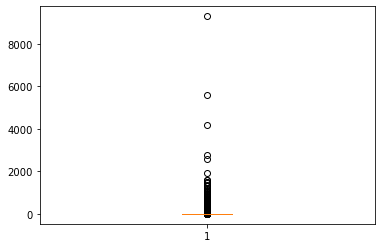

In [34]:
plt.boxplot(views.views)
plt.show()

In [35]:
#check on views to see if they're real. They appear real
views[views.views >2000]

,company,industry,doc_name,views
10781,Altera Infrastructure,Oilfield Service Company,Upstream Asset Report,4189
34686,Boston Consulting Group (BCG),Consulting,Upstream M&A Trends Report - April 2019,2781
185865,Schlumberger,Oilfield Service Company,US Rig Monitor: Gas drilling picks up but stil...,5580
200440,SOCAR Trading,Trading,"Mozambique: LNG projects affected by Covid-19,...",2585
225877,University of Oslo,Research Institute/University,Covid-19 Report - 14 May 2020,9292


In [42]:
#Explore doc_name
views.doc_name.value_counts().tail(20)

Background data on tax models, supporting petroleum fiscal systems presentation                                                  1
UKCS Business Development Atlas April 2018                                                                                       1
Week 6: US weekly crude stocks data to show ~4 mmbbl build                                                                       1
Update: North Dakota’s January output underperforms against our expectations, but positive trend remains in place for 1H 2018    1
UKCS Business Development Atlas August 2018                                                                                      1
Area 1 LNG (T1&T2), MZ OFS Factsheet                                                                                             1
??2021?????????????                                                                                                              1
US weekly crude stocks data to show 5.85 million barrels draw                      

In [55]:
#Find Doc_Name that isn't real
views[views['doc_name'].str.find("??") != -1]

,company,industry,doc_name,views
386,A.T. Kearney,Consulting,FPSO??——2020?????,1
1079,A.T. Kearney,Consulting,???????FPSO????????,2
1080,A.T. Kearney,Consulting,??????????FPSO????,2
1081,A.T. Kearney,Consulting,?????????????????????,2
1082,A.T. Kearney,Consulting,????????????????????,2
...,...,...,...,...
242577,Zhenhua Oil,Energy Company,????????????????,2
242578,Zhenhua Oil,Energy Company,????????????2026???,4
242579,Zhenhua Oil,Energy Company,??“??”??????????100??/?,2
242580,Zhenhua Oil,Energy Company,??????????????????,2


In [56]:
#Drop Doc Names with ??
views2 = views[views['doc_name'].str.find("??") == -1]

In [59]:
print(views.shape)
print(views2.shape)

(243371, 4)
(242373, 4)


In [60]:
#investigate company
views2.company.value_counts()
##Lots of Service Companies accounting for views

Schlumberger                              4258
Baker Hughes                              3416
Halliburton                               3081
National Oilwell Varco                    2450
Barrow, Hanley, Menwhinney and Strauss    2306
                                          ... 
Castle Rock Energy                           1
Okea                                         1
Stockholm University                         1
Avedon Capital Partners                      1
ESG Tech                                     1
Name: company, Length: 968, dtype: int64

                                    views
industry                                 
Banking                            104741
Broker                               1384
Buy Side                            39091
Consulting                          44605
Energy Company                     165032
Government bodies & Organizations   21477
Industrial                          15179
Media                                1248
Oilfield Service Company           344968
Other                              165558
Renewable Energy Company             5504
Renewable Energy Service Company      613
Research Institute/University       22101
Trading                             15023


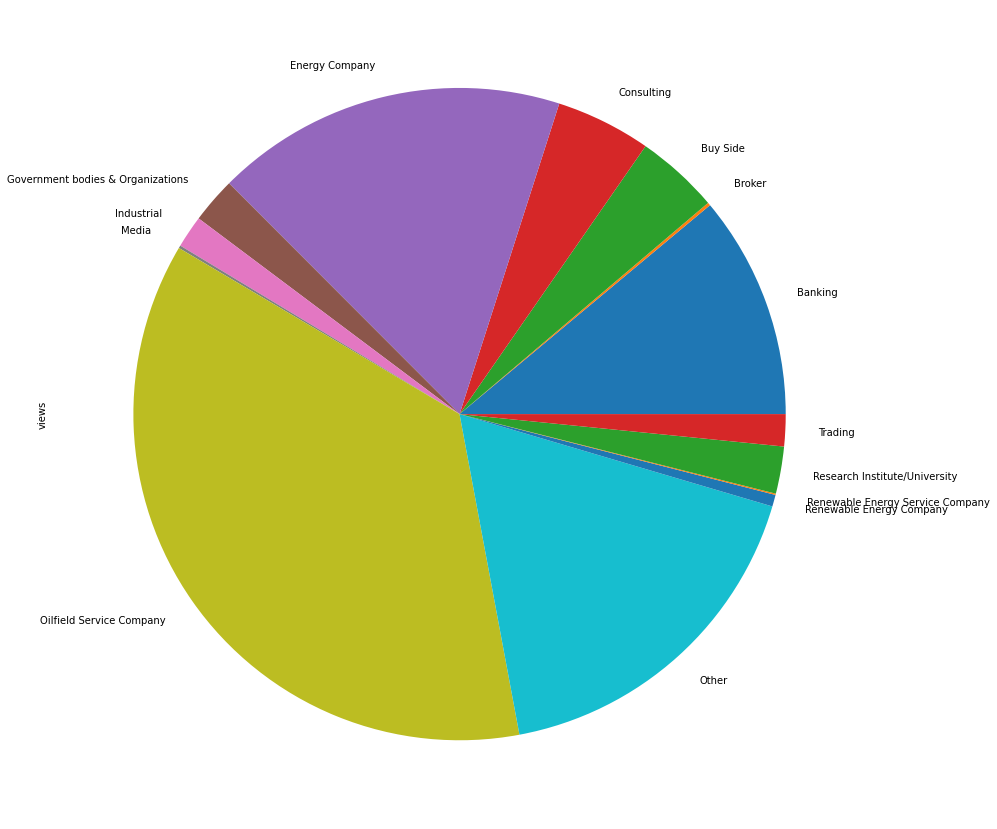

In [73]:
#plot views on pie chart with industry
grouped = views2.groupby('industry').agg('sum')
print(grouped)
grouped.plot.pie(y='views', figsize=(15,15), legend=False)


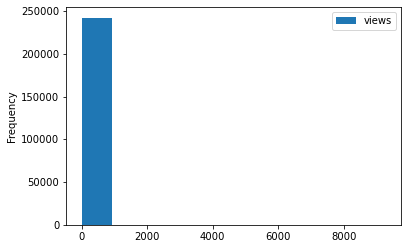

In [75]:
#Histogram of views is heavily right tailed because of some very high values
views2.plot.hist(views)

In [77]:
np.mode(views2.views)

AttributeError: module 'numpy' has no attribute 'mode'

In [81]:
#most are viewed one time with the average being 4
views2.views.mode()

0    1
dtype: int64

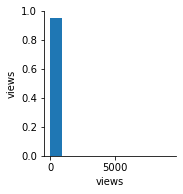

In [82]:
sns.pairplot(views2)